# Customer Lifetime Value and Boston House Price

- <font size=3>https://reurl.cc/8Gagoy</font>

# 載入程式庫及必要定義

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure/regression\\'
data_dir = groot_dir + 'regression\\'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

EX1DATA = '147xBeCECYur0FxDyly-oG2BqsqEH2Mxm'
EX1DATA2 = '101qw-9OkjCxwuSkBJUBaGURRWpZbFKOe'
EX5DATA = '1nNM8CN9CkRfjipRx1qJYZhSobmABVL1J'
ADVER = '1xFMcCuiMgX9VnelDtbyyV9rXBMFerx8k'
TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...') 
print('\nLibraries and dependenciess imported')
print_now()


Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\regression\

This module is amied to leran regression basics...

Libraries and dependenciess imported
2021-03-16 08:04:09.959075


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# 下載資料檔案

In [2]:
fetch_file_via_requests(
    DropboxLink('e7lsf1k6258w7co', 'ec_201012_test_4.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('fwokyefy0looizp', 'ec_201012_train_4.csv'), data_dir )

'C:\\Users\\TyKA\\Google Drive\\adventures\\regression\\ec_201012_train_4.csv'

In [3]:
import sklearn.metrics
for x in sklearn.metrics.SCORERS.keys():
    print(x)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


# Preparing Data

訓練資料與測試（test）資料的名稱 ec_201012_train_4.csv 和 ec_201012_test_4.csv, 這兩個資料集的欄位相同，包括：

```
'CustomerID', 'date_size', 'date_recency', 'date_time_between',
'date_T', 'baseket_value_sum', 'baseket_value_mean',
'baseket_value_std', 'baseket_value_amax', 'baseket_value_amin',
'baseket_value_median', 'basket_size_sum', 'basket_size_mean',
'basket_size_std', 'basket_size_amax', 'basket_size_amin',
'basket_size_median', 'lag_12', 'lag_11', 'lag_10', 'lag_9', 'lag_8',
'lag_7', 'lag_6', 'lag_5', 'lag_4', 'lag_3', 'lag_2', 'lag_1', 'value'
```

最後一個欄位 <font color='brown'>‘value’</font> 是本案例需要預測的對象，是指未來一定期間內客戶購買的金額，也就是所謂的「貢獻值」。

### 資料命名規則

- CLV Case
    - train: 訓練集載入 DataFrame
    - test: 測試集載入 DataFrame
    - X_train, y_train (clv case 訓練集)
    - X_test, y_test (clv case 測試集)
- load_boston()
    - X_bos, y_bos (load_boston() 資料)
    - bos (資料打包為 Pandas DataFrame)

In [3]:
train_csv = os.path.join(data_dir, 'ec_201012_train_4.csv')
test_csv = os.path.join(data_dir, 'ec_201012_test_4.csv')

In [4]:
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

X_train = train.drop(['CustomerID','value'], axis = 1)
y_train = train.value
X_test = test.drop(['CustomerID','value'], axis = 1)
y_test = test.value

In [2]:
from sklearn.datasets import load_boston

data = load_boston()
bos = pd.DataFrame(data = data['data'], 
    columns = data['feature_names'])
bos['y'] = data['target']
X_bos = bos.drop(['y'], axis = 1)
y_bos = bos.y

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

## 常常需要載入的 Classes

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Modeling

## Customter Lifetime Value

In [9]:
# 確認空白值
train.isnull().sum() , test.isnull().sum()

(CustomerID              0
 date_size               0
 date_recency            0
 date_time_between       0
 date_T                  0
 baseket_value_sum       0
 baseket_value_mean      0
 baseket_value_std       0
 baseket_value_amax      0
 baseket_value_amin      0
 baseket_value_median    0
 basket_size_sum         0
 basket_size_mean        0
 basket_size_std         0
 basket_size_amax        0
 basket_size_amin        0
 basket_size_median      0
 lag_12                  0
 lag_11                  0
 lag_10                  0
 lag_9                   0
 lag_8                   0
 lag_7                   0
 lag_6                   0
 lag_5                   0
 lag_4                   0
 lag_3                   0
 lag_2                   0
 lag_1                   0
 value                   0
 dtype: int64,
 CustomerID              0
 date_size               0
 date_recency            0
 date_time_between       0
 date_T                  0
 baseket_value_sum       0
 baseket_valu

In [10]:
corr = train.corr()

<AxesSubplot:>

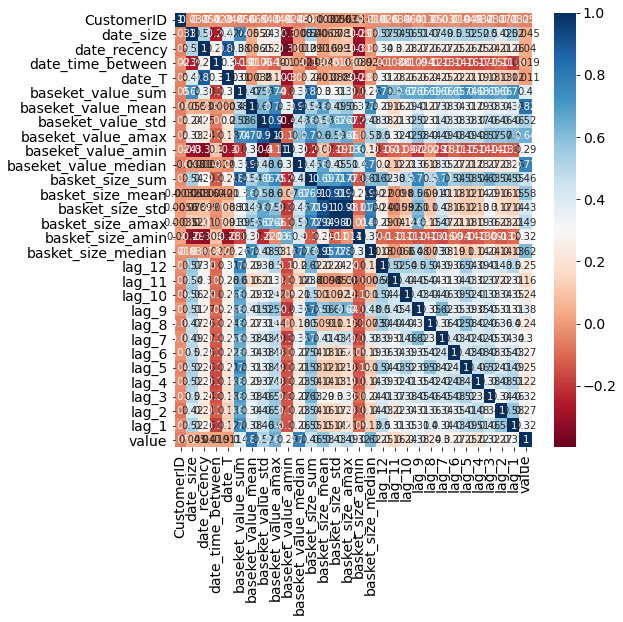

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(data=corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot = True, cmap = "RdBu", ax = ax)

In [12]:
 # heatmap欄位取捨 - 相關性確認
corr["value"].sort_values(ascending=False)

value                   1.000000
baseket_value_mean      0.820950
baseket_value_median    0.769741
baseket_value_amax      0.640401
basket_size_median      0.615922
basket_size_mean        0.581619
baseket_value_std       0.517536
basket_size_amax        0.485117
basket_size_sum         0.458280
basket_size_std         0.425567
baseket_value_sum       0.397159
lag_9                   0.376535
lag_3                   0.318715
lag_1                   0.316485
basket_size_amin        0.315138
lag_7                   0.298841
baseket_value_amin      0.286957
lag_2                   0.273617
lag_6                   0.270893
lag_12                  0.251336
lag_5                   0.251026
lag_8                   0.237849
lag_10                  0.235228
lag_4                   0.222124
lag_11                  0.163937
date_size               0.044787
date_recency            0.040299
date_time_between       0.019402
date_T                  0.011203
CustomerID             -0.052041
Name: valu

In [13]:
train.head()

,CustomerID,date_size,date_recency,date_time_between,date_T,baseket_value_sum,baseket_value_mean,baseket_value_std,baseket_value_amax,baseket_value_amin,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,value
0,12747,20,352,18,359,4610.02,230.501000,189.437736,715.10,-31.80,...,202.64,190.43,267.37,646.75,0.00,629.68,0.00,1047.75,388.85,1619.826187
1,12748,91,360,4,362,18904.63,207.743187,272.585239,1311.77,-309.73,...,1046.15,241.94,1205.59,700.76,746.50,2643.18,2177.74,2511.67,4232.07,1715.173813
2,12749,6,136,27,148,2460.29,410.048333,594.890110,1198.82,-183.05,...,0.00,0.00,0.00,0.00,764.55,0.00,0.00,1015.77,679.97,1439.007279
3,12820,8,337,48,361,1705.60,213.200000,128.007943,371.56,-41.58,...,0.00,0.00,186.87,0.00,207.33,0.00,0.00,278.00,178.55,1105.152652
4,12823,10,285,31,306,4742.00,474.200000,510.838048,1912.50,190.50,...,508.00,317.50,317.50,381.00,508.00,0.00,381.00,0.00,1912.50,1452.556019


In [9]:
from sklearn.pipeline import Pipeline, make_pipeline

the_model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

train_x = X_train
test_x = X_test
train_y = y_train
test_y = y_test

the_model.fit(train_x, train_y)
y_pred = the_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)
r2, rmse

(0.6182389801675537, 206.1690135064552)

## load_boston

<AxesSubplot:>

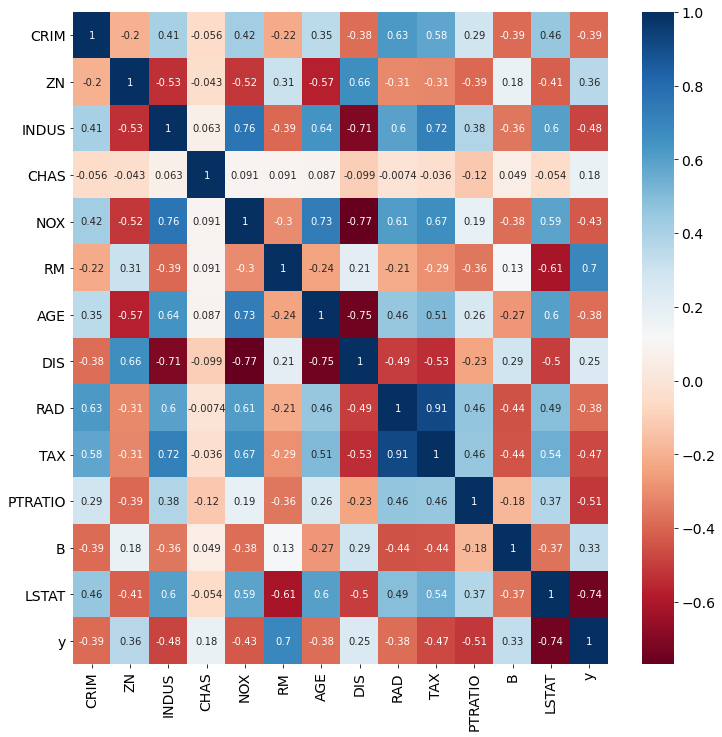

In [15]:
corr = bos.corr()

fig, ax = plt.subplots(figsize= (12, 12))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot = True, cmap = "RdBu", ax = ax)

In [16]:
train_x, test_x, train_y, test_y = \
    train_test_split(X_bos, y_bos, test_size = 0.2, random_state = 0)

model = make_pipeline(
    MinMaxScaler(),
    LinearRegression()
)

model.fit(train_x, train_y)
y_pred = model.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
r2 = r2_score(test_y, y_pred)
r2, rmse

(0.5892223849182502, 5.78350931508514)

In [10]:
from statsmodels.tools.eval_measures import rmse

model = simple_ols(X_bos, y_bos)
rmse_score = rmse(y_bos, model.fittedvalues)
print(r2, rmse_score)

0.6182389801675537 4.679191295697281


# Charting

In [18]:
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

## 誤差值的統計分佈模型 Distribution of Residuals

- Points are **independent** of each other (residuals are uncorrelated)
- <font color='brown'>**residual ε are normally distributed with  μ = 0**</font>

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


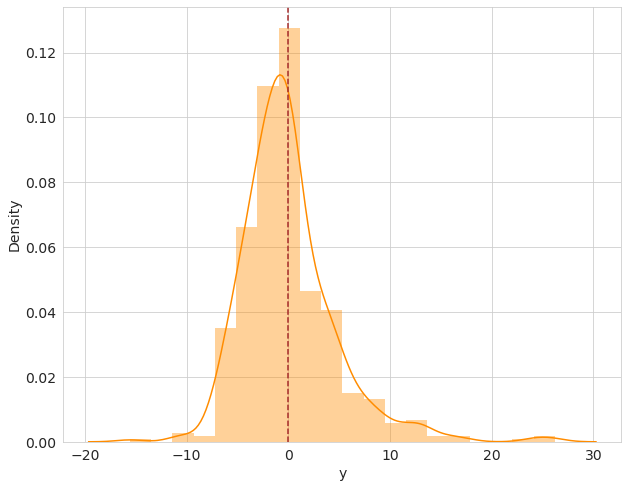

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_bos, y_bos)
y_pred = model.predict(X_bos)

ax = start_plot()
sns.distplot(y_bos - y_pred, bins=20, color = "darkorange", ax = ax)
ax.axvline(x = 0, ls = "--", c = "brown")

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


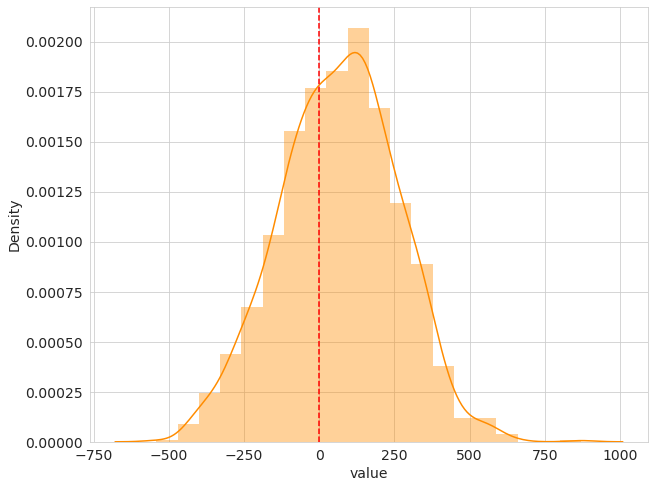

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ax = start_plot()
sns.distplot(y_test - y_pred, bins = 20, color = "darkorange",
             ax = ax)
ax.axvline(x = 0, ls = "--", color = "r")

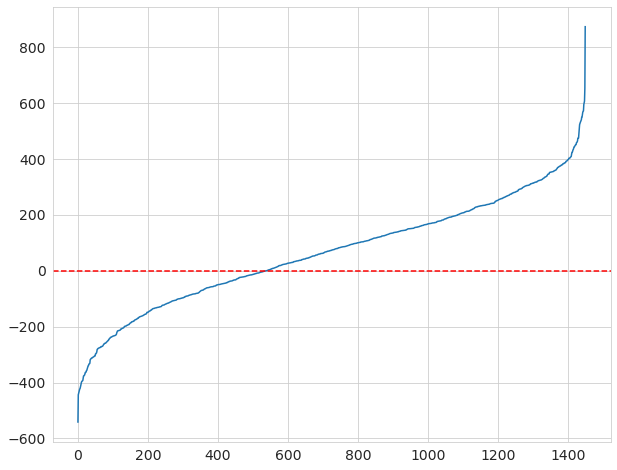

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = y_test

residuals = (y_true - y_pred).sort_values(ascending = True)
ax = start_plot()
ax.plot(range(len(residuals)), residuals)
ax.axhline(y = 0, ls = "--", color = "r")


## 預測值的範圍與分佈

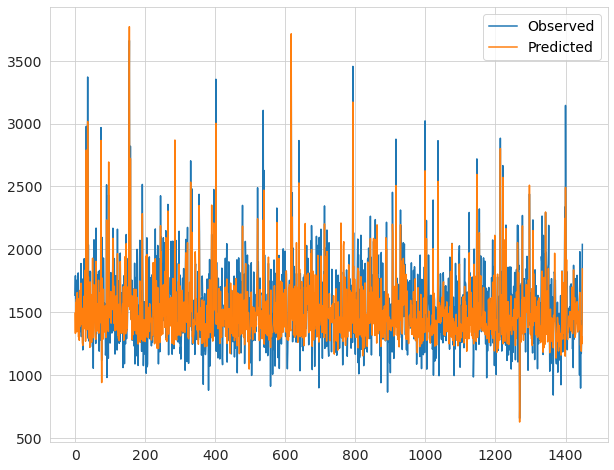

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_true = y_test

ax = start_plot()
ax.plot(y_true, label = "Observed")
ax.plot(y_pred, label = "Predicted")
ax.legend(frameon = True, fontsize = 14)

<AxesSubplot:>

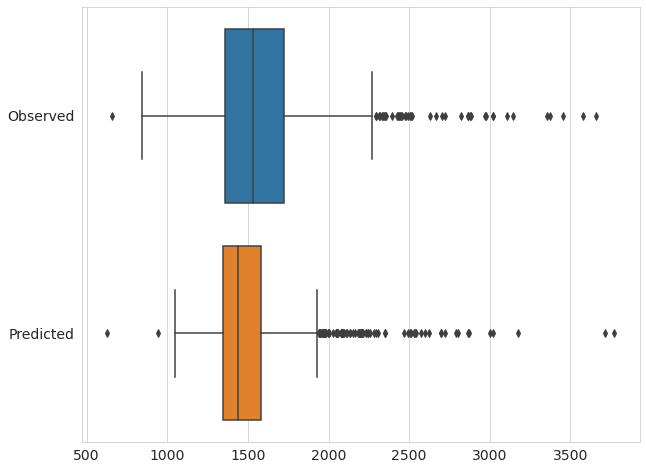

In [27]:
ndf = pd.DataFrame()
ndf["Observed"] = y_true
ndf["Predicted"] = y_pred

ax = start_plot()
sns.boxplot(data = ndf, orient="h", ax = ax)

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

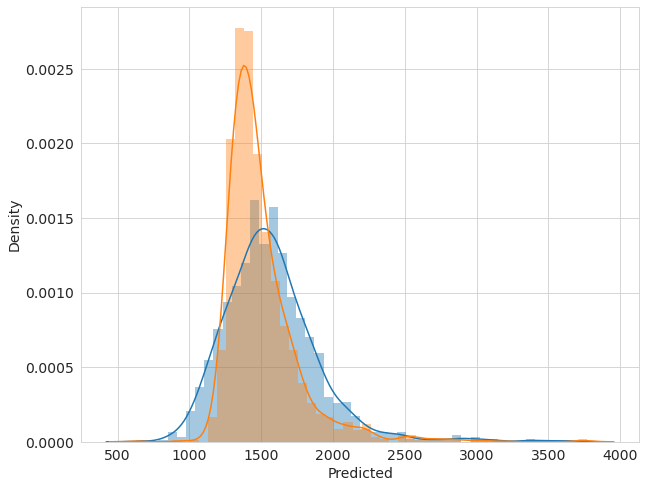

In [28]:
ax = start_plot()
sns.distplot(ndf["Observed"])
sns.distplot(ndf["Predicted"])

## $ y  - \hat y$ (預測效果) 的分析 （Regression Prediction Error）

- [YellowBrick PredictionErrorPlot](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)

![texto alternativo](https://www.scikit-yb.org/en/latest/api/regressor/peplot-1.png)

In [30]:
conda install yellowbrick

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - yellowbrick

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = y_test

C:\Users\TyKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


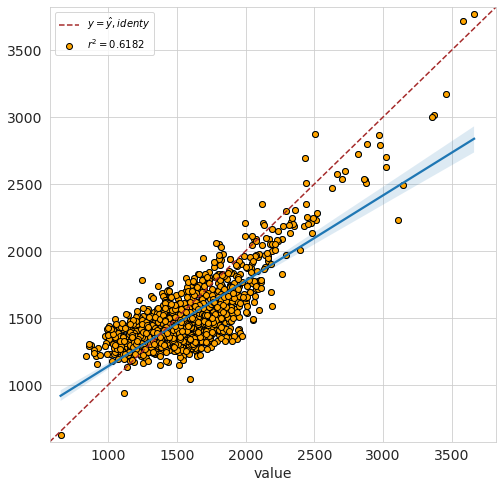

In [41]:
ax = start_plot(figsize = (8, 8))
sns.regplot(y_test, y_pred)
ax.scatter(y_true, y_pred, edgecolor = "k", color = "orange",
           label = r"$r^2=%.4f$" %r2_score(y_true, y_pred))

# 確保圖形 X, Y 完全對稱
lim1 = min(min(y_true), min(y_pred)) - 50
lim2 = max(max(y_true), max(y_pred)) + 50
lim = [lim1, lim2]
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, c = "brown", ls = "--", label = r"$y=\hat y, identy$")
ax.legend()

## Residuals Analysis 錯誤值的分析

- [Residuals Plot](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_true_train = y_train
y_true_test = y_test
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

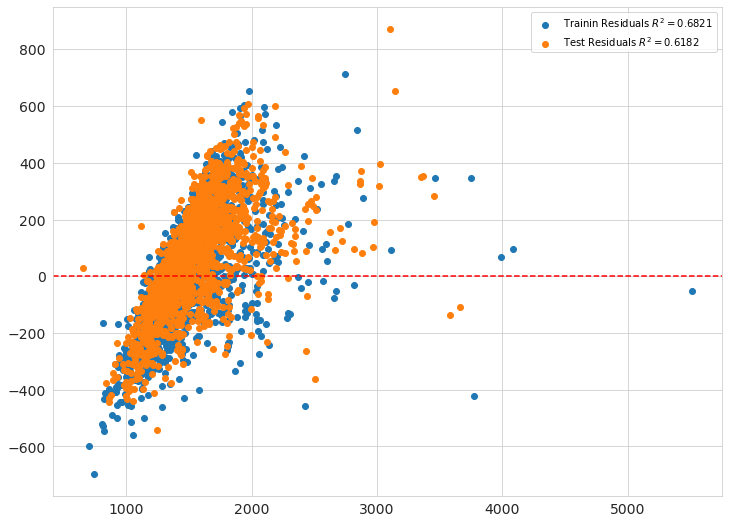

In [45]:
ax = start_plot(figsize = (12, 9))
r2_train = r2_score(y_true_train, y_pred_train)
r2_test = r2_score(y_true_test, y_pred_test)
ax.scatter(y_true_train, residuals_train,
           label = "Trainin Residuals " + r"$R^2=%.4f$" % r2_train)
ax.scatter(y_true_test, residuals_test,
           label = "Test Residuals " + r"$R^2=%.4f$" %r2_test)
ax.axhline(y = 0, ls = "--", c = "r")
plt.legend(frameon = True, fancybox = True)

In [46]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_true_train = y_train
y_true_test = y_test
residuals_train = y_true_train - y_pred_train
residuals_test = y_true_test - y_pred_test
r2_train = r2_score(y_true_train, y_pred_train)
r2_test = r2_score(y_true_test, y_pred_test)

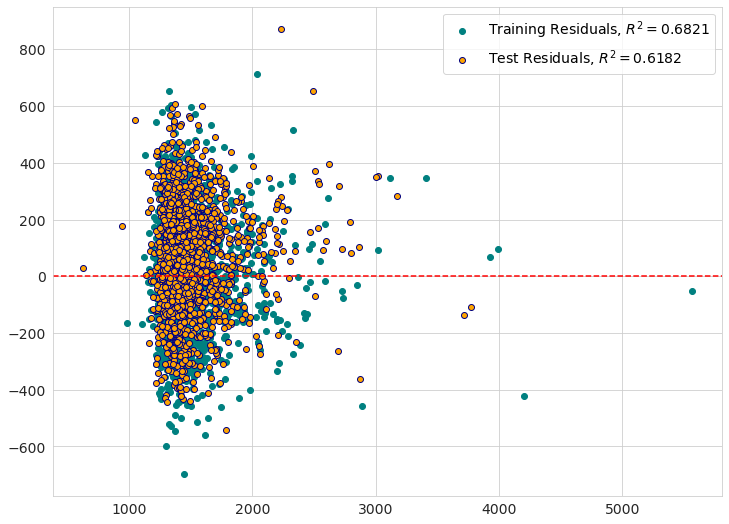

In [50]:
ax = start_plot(figsize = (12, 9))
ax.scatter(y_pred_train, residuals_train, color = "teal",
           label = "Training Residuals, " + r"$R^2=%.4f$" %r2_train)
ax.scatter(y_pred_test, residuals_test, color = "orange", edgecolor = "navy",
           label = "Test Residuals, " + r"$R^2=%.4f$" %r2_test)
ax.axhline(y = 0, ls = "--", color = "r")
ax.legend(frameon = True, fancybox = True, fontsize = 14)

### My Residuals Plot

## 學習曲線

In [51]:
from sklearn.model_selection import learning_curve

#
# Simplified version of plot_learning_curves presented in 
#   https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#

def my_plot_leaning_curves(model, X, y, cv=None, scoring = None,
        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
       
    fig,ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, 
            scoring = scoring,
            train_sizes=train_sizes,
            return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve


    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.grid(b = 'on', ls = '--', alpha = 0.8)
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    ax.legend(loc="best", fontsize = 14, shadow =True, frameon = True)

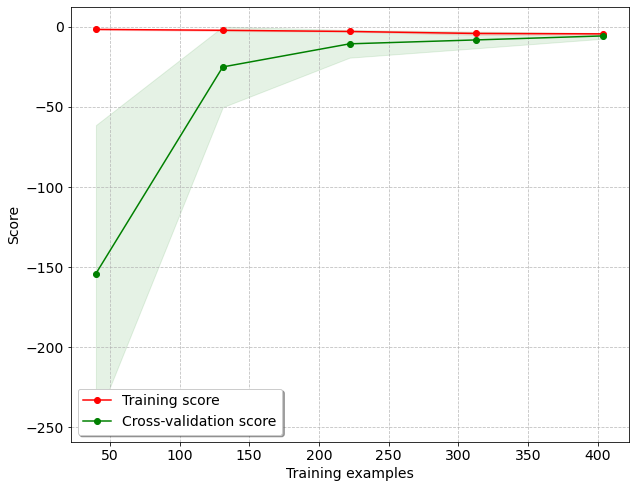

In [52]:
my_plot_leaning_curves(LinearRegression(), X_bos, y_bos,
    train_sizes=np.linspace(.1, 1.0, 5),
    scoring='neg_root_mean_squared_error')

# Metrics & Outliers

## Cook's Distance

- [Wikipedia](https://en.wikipedia.org/wiki/Cook%27s_distance)
- [Mathworks](https://www.mathworks.com/help/stats/cooks-distance.html#:~:text=Cook's%20distance%20is%20the%20scaled,on%20the%20fitted%20response%20values.)
- [Stackoverflow QA](https://stackoverflow.com/questions/51390196/how-to-calculate-cooks-distance-dffits-using-python-statsmodel)

- [MAPE formula](https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069)

- [Issue 15007](https://github.com/scikit-learn/scikit-learn/pull/15007)

>Simply said, Cook’s D is calculated by removing the ith data point from the model and recalculating the regression. All the values in the regression model are then observed whether changes have been detected after the removal of the point. This is an iterative way of examining the influence of that observation.



以 loas_boston 為例：

```
model = simple_ols(X_bos, y_bos)
infl = model.get_influence()
rdf = infl.summary_frame()
cooks_d = rdf['cooks_d']
```

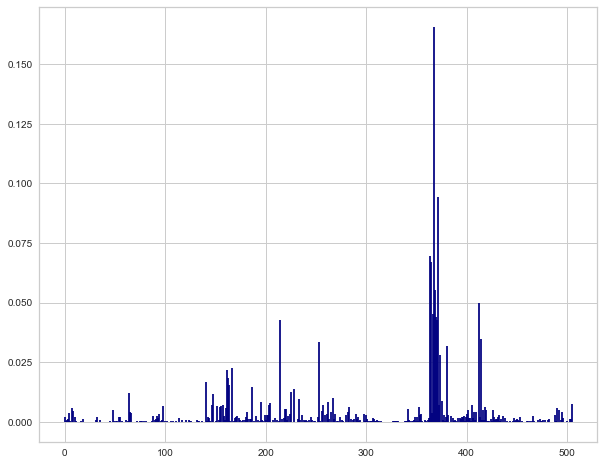

In [53]:
from yellowbrick.regressor import CooksDistance

model = simple_ols(X_bos, y_bos)
infl = model.get_influence()
rdf = infl.summary_frame()
cooks_d = rdf["cooks_d"]
ax = start_plot()
ax.vlines(range(len(rdf)), cooks_d,0, color = "navy")

In [55]:
cooks_d = rdf["cooks_d"].sort_values(ascending = False)
type(cooks_d), cooks_d

(pandas.core.series.Series,
 368    1.656737e-01
 372    9.409651e-02
 364    6.942966e-02
 365    6.718425e-02
 369    5.526255e-02
            ...     
 9      4.013832e-08
 456    2.098935e-08
 68     1.977438e-08
 226    1.446598e-08
 286    3.038789e-10
 Name: cooks_d, Length: 506, dtype: float64)

In [56]:
top8 = cooks_d.index[:int(len(cooks_d.index) * 0.08)]

In [58]:
top8 = list(top8)

In [59]:
u3 = 3 * cooks_d.mean()
above3 = list(cooks_d.loc[cooks_d > u3].index)
above3

[368,
 372,
 364,
 365,
 369,
 412,
 367,
 370,
 214,
 371,
 414,
 253,
 380,
 374,
 166,
 161,
 162,
 141,
 163,
 186,
 228,
 225,
 64,
 148,
 267,
 233]

In [60]:
bos2 = bos.drop(above3, axis = 0)

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_bos, y_bos)
scores2 = cross_val_score(LinearRegression(),
                          bos2.drop(["y"], axis = 1), bos2["y"])
print(scores)
print(scores.mean(), scores.std())
print("\n")
print(scores2)
print(scores2.mean(), scores2.std())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958823 0.37656783933262156


[0.7086201  0.82324401 0.74454528 0.55247982 0.34892936]
0.6355637111220663 0.1682262160672289


- [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [What Is R Squared And Negative R Squared](http://www.fairlynerdy.com/what-is-r-squared/)
- [Can the multiple linear correlation coefficient be negative?](https://stats.stackexchange.com/questions/6181/can-the-multiple-linear-correlation-coefficient-be-negative)

### yellowbrick 版本

```
from yellowbrick.regressor import CooksDistance
from sklearn.datasets import load_boston

data = load_boston()
X, y = data['data'], data['target']

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()
```

## VIF

>Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

- [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)
- [endog, exog, what’s that?](https://www.statsmodels.org/stable/endog_exog.html)

In [11]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston

def vif_scores(df):
    df.dropna()
    # df = df._get_numeric_data()
    df = df.select_dtypes(include=[np.number])
    vif = pd.DataFrame()

    vif["VIF Factor"] = \
        [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    vif["features"] = df.columns
    return vif

def my_mape(estimator, X, y): 
    estimator.fit(X, y)
    y_pred = estimator.predict(X)
    y_true = y
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

In [63]:
bos2 = bos.copy()
vif = vif_scores(bos2.drop(["y"], axis = 1))
vif

,VIF Factor,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [65]:
vindex = list(vif["VIF Factor"].sort_values(ascending=False).index)

In [66]:
vindex

[10, 5, 4, 9, 6, 11, 8, 7, 2, 12, 1, 0, 3]

In [67]:
vif.iloc[vindex[:3]]["features"]

10    PTRATIO
5          RM
4         NOX
Name: features, dtype: object

In [68]:
bos2 = bos2.drop(vif.iloc[vindex[:3]]["features"], axis = 1)

In [69]:
bos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   RAD     506 non-null    float64
 7   TAX     506 non-null    float64
 8   B       506 non-null    float64
 9   LSTAT   506 non-null    float64
 10  y       506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_bos, y_bos)
scores2 = cross_val_score(LinearRegression(), bos2.drop(["y"], axis = 1), bos2.y)

print(scores)
print(scores.mean(), scores.std())
print("\n")
print(scores2)
print(scores2.mean(), scores2.std())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958823 0.37656783933262156


[0.37380341 0.57986667 0.38025632 0.54894859 0.19426611]
0.4154282179101513 0.1391043206034072


# 降維

## Principal Component Analysis


- [線代啟示錄：主成分分析](https://ccjou.wordpress.com/2013/04/15/主成分分析/)
- [機器/統計學習:主成分分析(Principal Component Analysis, PCA)](https://medium.com/@chih.sheng.huang821/機器-統計學習-主成分分析-principle-component-analysis-pca-58229cd26e71)
- [主成分分析的原理](http://web.ntpu.edu.tw/~ccw/statmath/M_pca.pdf)
- [如何通俗易懂地讲解什么是 PCA 主成分分析？](https://www.zhihu.com/question/41120789)
- [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [scikit-learn User Guide: 2.5. Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html#pca)

- [Principal Component Analysis (PCA) in Python](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)
- [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# model = LinearRegression()

model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

TRAINING_RMSE = -np.sqrt(mean_squared_error(y_train, yhat_train))
TEST_RMSE = -np.sqrt(mean_squared_error(y_test, yhat_test))

TRAINING_SCORE = model.score(X_train, y_train)
TEST_SCORE = model.score(X_test, y_test)

print('training: score = %.4f, neg rmse = %.4f' % 
      (TRAINING_SCORE, TRAINING_RMSE))
# yhat = lin.predict(X_test)
print('test: score = %.4f, neg rmse = %.4f' % 
      (TEST_SCORE, TEST_RMSE))


training: score = 0.6821, neg rmse = -200.4892
test: score = 0.6182, neg rmse = -206.1690


In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression


In [16]:
# original number of components
N = len(X_train.columns)

scores_train = np.zeros(N)
scores_test = np.zeros(N)

for i in np.arange(N, 2, -1):
    model = make_pipeline(
        StandardScaler(),
        PCA(n_components=i),
        LinearRegression()
    )
    
    model.fit(X_train, y_train)
    scores_train[i-1] = model.score(X_train, y_train)
    scores_test[i-1] = model.score(X_test, y_test)

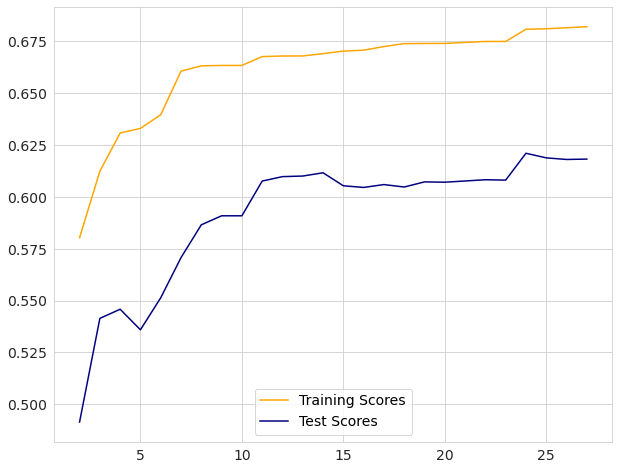

In [17]:
x_domain = np.arange(2, N, 1)
ax = start_plot()
ax.plot(x_domain, scores_train[2:], color="orange", label = "Training Scores")
ax.plot(x_domain, scores_test[2:], color = "navy", label="Test Scores")
ax.legend(loc = "lower center", frameon = True, fontsize = 14)

### Git it a try

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

def PCA_analysis(estimater, n_features, X_train, y_train, 
    X_test = None, y_test = None):

    N = n_features

    scores_train = np.zeros(N)
    scores_test = np.zeros(N)

    for i in np.arange(N, 2, -1):
        model = make_pipeline(
            PCA(n_components = i),
            estimater
        )
        model.fit(X_train, y_train)
        scores_train[i-1] = model.score(X_train, y_train)
        if X_test is not None:
            scores_test[i-1] = model.score(X_test, y_test)

    xdomain = np.arange(2, N, 1)
    ax = start_plot(figsize=(10,7))
    ax.plot(xdomain, scores_train[2:], label = 'Training Scores')
    if X_test is not None:
        ax.plot(xdomain, scores_test[2:], color = 'brown',
            label = 'Test Scores')
    ax.legend(loc='lower center', frameon=True,shadow=True,fancybox=True,fontsize=14)


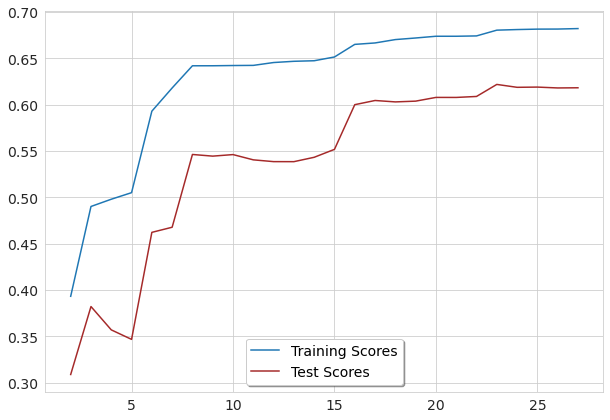

In [19]:
from sklearn.preprocessing import MinMaxScaler

model = make_pipeline(
    MinMaxScaler(),
    LinearRegression(),
)

PCA_analysis(model, X_train.shape[1], X_train, y_train, X_test, y_test)